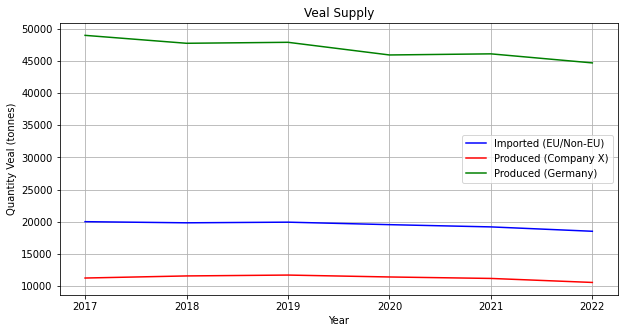

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
years = [2017, 2018, 2019, 2020, 2021, 2022]
quantities_supplied_veal_x = np.array([11235, 11561, 11696, 11399, 11172, 10548])

# https://www-genesis.destatis.de/genesis/online?language=de&sequenz=tabelleErgebnis&selectionname=41331-0001
quantities_supplied_veal_germany = np.array([48980, 47747, 47899, 45930, 46103, 44696])

# https://de.statista.com/statistik/daten/studie/28974/umfrage/importe-deutschlands-von-rindfleisch-und-kalbfleisch/
quantities_imported_veal = np.array([500000*4/100, 495600*4/100, 498100*4/100, 488400*4/100, 479700*4/100, 462700*4/100])

consumer_prices = np.array([4.980, 5.037, 4.826, 4.715, 5.127, 6.171])

# plot import over time

plt.figure(figsize=(10, 5))
plt.plot(years, quantities_imported_veal, label='Imported (EU/Non-EU)', color='blue')
plt.plot(years, quantities_supplied_veal_x, label='Produced (Company X)', color='red')
plt.plot(years, quantities_supplied_veal_germany, label='Produced (Germany)', color='green')
plt.xlabel('Year')
plt.ylabel('Quantity Veal (tonnes)')
plt.title('Veal Supply')

# Adding legend
plt.legend()
plt.grid(True)
plt.show()

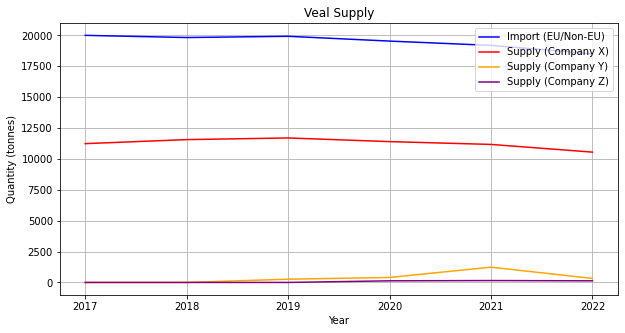

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given data Schlachtgewichte
years = [2017, 2018, 2019, 2020, 2021, 2022]
quantities_supplied_veal_x = np.array([11235, 11561, 11696, 11399, 11172, 10548])
quantities_supplied_veal_y = np.array([0, 0, 263, 403, 1236, 324])
quantities_supplied_veal_z = np.array([0, 0, 0, 132, 154, 132])

# https://www-genesis.destatis.de/genesis/online?language=de&sequenz=tabelleErgebnis&selectionname=41331-0001
quantities_supplied_veal_germany = np.array([48980, 47747, 47899, 45930, 46103, 44696])

# https://de.statista.com/statistik/daten/studie/28974/umfrage/importe-deutschlands-von-rindfleisch-und-kalbfleisch/
quantities_imported_veal = np.array([500000*4/100, 495600*4/100, 498100*4/100, 488400*4/100, 479700*4/100, 462700*4/100])

consumer_prices = np.array([4.980, 5.037, 4.826, 4.715, 5.127, 6.171])

# plot import over time

plt.figure(figsize=(10, 5))
plt.plot(years, quantities_imported_veal, label='Import (EU/Non-EU)', color='blue')
plt.plot(years, quantities_supplied_veal_x, label='Supply (Company X)', color='red')
plt.plot(years, quantities_supplied_veal_y, label='Supply (Company Y)', color='orange')
plt.plot(years, quantities_supplied_veal_z, label='Supply (Company Z)', color='purple')
plt.xlabel('Year')
plt.ylabel('Quantity (tonnes)')
plt.title('Veal Supply')

# Adding legend
plt.legend()
plt.grid(True)
plt.show()

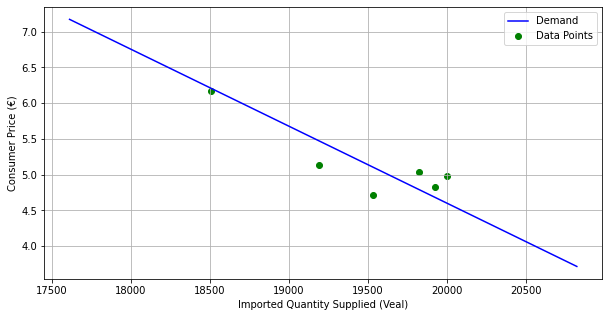

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
years = [2017, 2018, 2019, 2020, 2021, 2022]
consumer_prices = np.array([4.980, 5.037, 4.826, 4.715, 5.127, 6.171])
quantities_imported_veal_germany = np.array([500000*4/100, 495600*4/100, 498100*4/100, 488400*4/100, 479700*4/100, 462700*4/100])

# Sort data by consumer_prices
sorted_indices = np.argsort(consumer_prices)
consumer_prices = consumer_prices[sorted_indices]
quantities_imported_veal_germany = quantities_imported_veal_germany[sorted_indices]
# quantities_supplied_veal_germany = np.array([48980, 47747, 47899, 45930, 46103, 44696])

# Fit linear regression line for demand
demand_params = np.polyfit(consumer_prices, quantities_imported_veal_germany, 1)
# supply_params = np.polyfit(consumer_prices, quantities_supplied_veal_germany, 1)

# Function to compute the demand curve
def compute_demand_curve(params, prices):
    return params[0] * prices + params[1]

# Range of prices for plotting
price_range = np.linspace(min(consumer_prices)-1, max(consumer_prices)+1, 100)

# Plotting the demand curve
plt.figure(figsize=(10, 5))
plt.plot(compute_demand_curve(demand_params, price_range), price_range, label='Demand', color='blue')
# plt.plot(compute_demand_curve(supply_params, price_range), price_range, label='Supply', color='red')
plt.scatter(quantities_imported_veal_germany, consumer_prices, c='green', marker='o', label='Data Points')
plt.xlabel('Imported Quantity Supplied (Veal)')
plt.ylabel('Consumer Price (€)')
# plt.title('Simplified Demand Curve for Veal in Germany')

# Adding legend
plt.legend()
plt.grid(True)
plt.show()


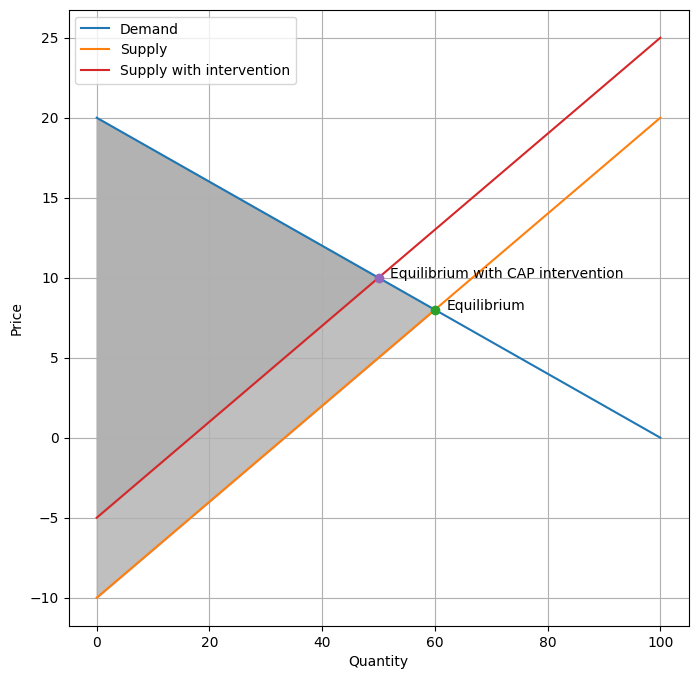

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following linear demand and supply curves
def demand(q):
    return 20 - 0.2 * q

def supply(q):
    return -10 + 0.3 * q

q = np.linspace(0, 100, 100)
plt.figure(figsize=(8, 8))

# Plotting the supply and demand curves
plt.plot(q, demand(q), label="Demand")
plt.plot(q, supply(q), label="Supply")

# Calculate and mark equilibrium without government intervention
q_equilibrium = (20 + 10) / (0.2 + 0.3)
p_equilibrium = demand(q_equilibrium)
plt.plot(q_equilibrium, p_equilibrium, marker='o')
plt.text(q_equilibrium + 2, p_equilibrium, f'Equilibrium')

# Calculate area of social surplus
q_left = (20 + 10) / (0.2 + 0.3)
q_right = 100
p_top = demand(q_left)
p_bottom = supply(q_left)

# Shade area of social surplus
plt.fill_between(q, demand(q), supply(q), where=((q>=0) & (q<=q_equilibrium)), color='grey', alpha=0.5)

# Simulating an intervention that shifts the supply curve
def supply_with_tax(q):
    return -10 + 0.3 * q + 5  # for example, a tax of 5

plt.plot(q, supply_with_tax(q), label="Supply with intervention")

# Calculate and mark new equilibrium with intervention
q_equilibrium_tax = (20 + 10 - 5) / (0.2 + 0.3)
p_equilibrium_tax = demand(q_equilibrium_tax)
plt.plot(q_equilibrium_tax, p_equilibrium_tax, marker='o')
plt.text(q_equilibrium_tax + 2, p_equilibrium_tax, f'Equilibrium with intervention')

# Shade area of social surplus after the intervention
plt.fill_between(q, demand(q), supply_with_tax(q), where=((q>=0) & (q<=q_equilibrium_tax)), color='grey', alpha=0.2)

plt.legend()
plt.xlabel("Quantity")
plt.ylabel("Price")
# plt.title("Veal Supply/Demand - Expected Impact of Government Intervention")
plt.grid(True)
plt.show()


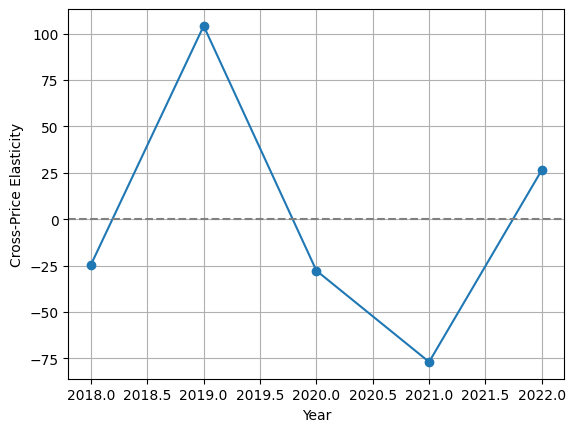

In [5]:
import numpy as np
import matplotlib.pyplot as plt

years = np.array([2017, 2018, 2019, 2020, 2021, 2022])

pork_prices = np.array([5.001, 4.617, 4.828, 5.151, 4.994, 5.499])
pork_quantities = np.array([2413.725, 1220.504, 1045.375, 866.780, 598.054, 1297.597])

veal_prices = np.array([24.194, 24.682, 24.648, 24.8, 24.9, 25.997])
veal_quantities = np.array([437.108, 927.115, 1152.930, 292.970, 287.062, 382.324])

percentage_change_in_quantity_pork = (pork_quantities[1:] - pork_quantities[:-1]) / pork_quantities[:-1]
percentage_change_in_price_veal = (veal_prices[1:] - veal_prices[:-1]) / veal_prices[:-1]

cross_price_elasticity = percentage_change_in_quantity_pork / percentage_change_in_price_veal

plt.plot(years[1:], cross_price_elasticity, marker='o')
plt.axhline(0, color='gray', linestyle='--')
# plt.title('Cross-Price Elasticity between Pork Schnitzel and Veal Schnitzel')
plt.xlabel('Year')
plt.ylabel('Cross-Price Elasticity')
plt.grid(True)
plt.show()